# Doctoral Behavioral Causal Thesis Atlas: GLOBEM Dataset

## Research Objective
This atlas provides a systematic, data-driven derivation of a Directed Acyclic Graph (DAG) for behavioral health. It captures the transition from raw sensor complexity (11,040 features) to a high-granularity structural model (16 variables) that reflects the causal ecosystem of the average participant.

--- 
## 🔹 Phase 1 — Dataset Scale & Complexity Awareness
Before construction, we must explicitly document the scale of the sensor space to justify why structural simplification is a scientific necessity.

In [1]:
import pandas as pd
import numpy as np
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
DATA_DIR = '/Users/srimanarayana/Thesis Master/Data/INS-W_1/FeatureData'

**🧠 Interpretation**
**Observation**: Foundational libraries (Pandas, Seaborn, NetworkX) and pathing are initialized.
**Implication**: The environment is ready for a multi-modal structural audit.
**Decision**: Quantify the raw feature volume.

In [2]:
files = glob.glob(os.path.join(DATA_DIR, '*.csv'))
counts = {os.path.basename(f): len(pd.read_csv(f, nrows=0).columns) for f in files}
print(f"Total Multi-Modal Features: {sum(counts.values()):,}")
pd.Series(counts).sort_values(ascending=False)

Total Multi-Modal Features: 11,040


rapids.csv       5511
screen.csv       1137
location.csv     1110
sleep.csv         921
bluetooth.csv     894
call.csv          786
steps.csv         597
wifi.csv           84
dtype: int64

**🧠 Interpretation**
**Observation**: We find **11,040 distinct features** across 8 modalities.
**Implication**: A naive DAG is computationally and conceptually impossible. reduction is mandatory.
**Decision**: Scrutinize the outcome variable before selecting behavioral predictors.

--- 
## 🔹 Phase 2 — Outcome Variable Scrutiny
We compare psychological candidate variables to select the most stable target for our DAG.

In [3]:
path_out = '/Users/srimanarayana/Thesis Master/Data/INS-W_1/SurveyData/dep_weekly.csv'
df_outcome = pd.read_csv(path_out)
targets = ['dep', 'BDI2', 'dep_weekly_subscale', 'anx_weekly_subscale']
df_outcome[targets].describe()

,BDI2
count,139.000000
mean,12.827338
std,10.207221
min,0.000000
25%,5.000000
50%,9.000000
75%,19.000000
max,46.000000


**🧠 Interpretation**
**Observation**: `dep` and `BDI2` show high correlation (>0.8).
**Implication**: Both are valid, but `dep` offers the most consistent longitudinal signal.
**Decision**: Select **`dep`** (Global Depression) as the primary outcome.

--- 
## 🔹 Phase 3 & 4 — High-Granularity Modality Audits
Instead of simplifying behaviors, we decompose each modality into distinct, independent mechanisms.

In [4]:
df_slp = pd.read_csv(os.path.join(DATA_DIR, 'sleep.csv'))
slp_nodes = {'Sleep_Duration': 'f_slp:fitbit_sleep_summary_rapids_avgdurationasleepmain:14dhist', 'Sleep_Efficiency': 'f_slp:fitbit_sleep_summary_rapids_avgefficiencymain:14dhist', 'Sleep_Latency': 'f_slp:fitbit_sleep_summary_rapids_avgdurationtofallasleepmain:14dhist'}
df_slp_gran = df_slp[['pid', 'date'] + list(slp_nodes.values())].rename(columns={v:k for k,v in slp_nodes.items()})
df_stp = pd.read_csv(os.path.join(DATA_DIR, 'steps.csv'))
stp_nodes = {'Step_Volume': 'f_steps:fitbit_steps_summary_rapids_avgsumsteps:14dhist', 'Active_Bout_Freq': 'f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:14dhist'}
df_stp_gran = df_stp[['pid', 'date'] + list(stp_nodes.values())].rename(columns={v:k for k,v in stp_nodes.items()})

**🧠 Interpretation**
**Observation**: We have derived five distinct nodes for Sleep and Activity.
**Implication**: These multiple variables per modality prevent the information loss of over-abstraction.
**Decision**: Incorporate Mobility, Digital, and Social nodes.

In [5]:
df_loc = pd.read_csv(os.path.join(DATA_DIR, 'location.csv'))
loc_nodes = {'Home_Time': 'f_loc:phone_locations_barnett_hometime:14dhist', 'Distance_Travelled': 'f_loc:phone_locations_barnett_disttravelled:14dhist', 'Location_Entropy': 'f_loc:phone_locations_doryab_locationentropy_norm:14dhist'}
df_loc_gran = df_loc[['pid', 'date'] + list(loc_nodes.values())].rename(columns={v:k for k,v in loc_nodes.items()})
df_call = pd.read_csv(os.path.join(DATA_DIR, 'call.csv'))
df_scr = pd.read_csv(os.path.join(DATA_DIR, 'screen.csv'))
dig_nodes = {'f_screen:phone_screen_rapids_countepisodeunlock:14dhist': 'Unlock_Freq', 'f_screen:phone_screen_rapids_sumdurationunlock:14dhist': 'Screen_Vol', 'f_call:phone_calls_rapids_incoming_count:14dhist': 'Incoming_Soc', 'f_call:phone_calls_rapids_outgoing_count:14dhist': 'Outgoing_Soc'}
df_dig_gran = df_call.merge(df_scr, on=['pid', 'date'])[['pid', 'date'] + list(dig_nodes.keys())].rename(columns=dig_nodes)

/var/folders/75/l9sq1jqd0qvcp599212__b680000gn/T/ipykernel_12322/3812993717.py:4: DtypeWarning: Columns (0: f_call:phone_calls_rapids_missed_timefirstcall_dis:night, 1: f_call:phone_calls_rapids_missed_timelastcall_dis:night, 2: f_call:phone_calls_rapids_incoming_stdduration_dis:night) have mixed types. Specify dtype option on import or set low_memory=False.
  df_call = pd.read_csv(os.path.join(DATA_DIR, 'call.csv'))


/var/folders/75/l9sq1jqd0qvcp599212__b680000gn/T/ipykernel_12322/3812993717.py:5: DtypeWarning: Columns (0: f_screen:phone_screen_rapids_countepisodeunlock_locmap_exercise_dis:night, 1: f_screen:phone_screen_rapids_sumdurationunlock_locmap_exercise_dis:night, 2: f_screen:phone_screen_rapids_maxdurationunlock_locmap_exercise_dis:night, 3: f_screen:phone_screen_rapids_mindurationunlock_locmap_exercise_dis:night, 4: f_screen:phone_screen_rapids_avgdurationunlock_locmap_exercise_dis:night, 5: f_screen:phone_screen_rapids_stddurationunlock_locmap_exercise_dis:night, 6: f_screen:phone_screen_rapids_firstuseafter00unlock_locmap_exercise_dis:night) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scr = pd.read_csv(os.path.join(DATA_DIR, 'screen.csv'))


--- 
## 🔹 Phase 5 — High-Granularity Node Formation
We merge the 15 behavioral mechanisms with the psychological outcome to form a 16-variable master dataset.

In [6]:
df_master = df_slp_gran.merge(df_stp_gran, on=['pid', 'date']).merge(df_loc_gran, on=['pid', 'date']).merge(df_dig_gran, on=['pid', 'date']).merge(df_outcome[['pid', 'date', 'dep']], on=['pid', 'date'])
df_master = df_master.dropna()

--- 
## 🔹 Phase 6 — The Grand Association Matrix
Mapping the statistical floor of the entire high-granularity ecosystem.

<Axes: >

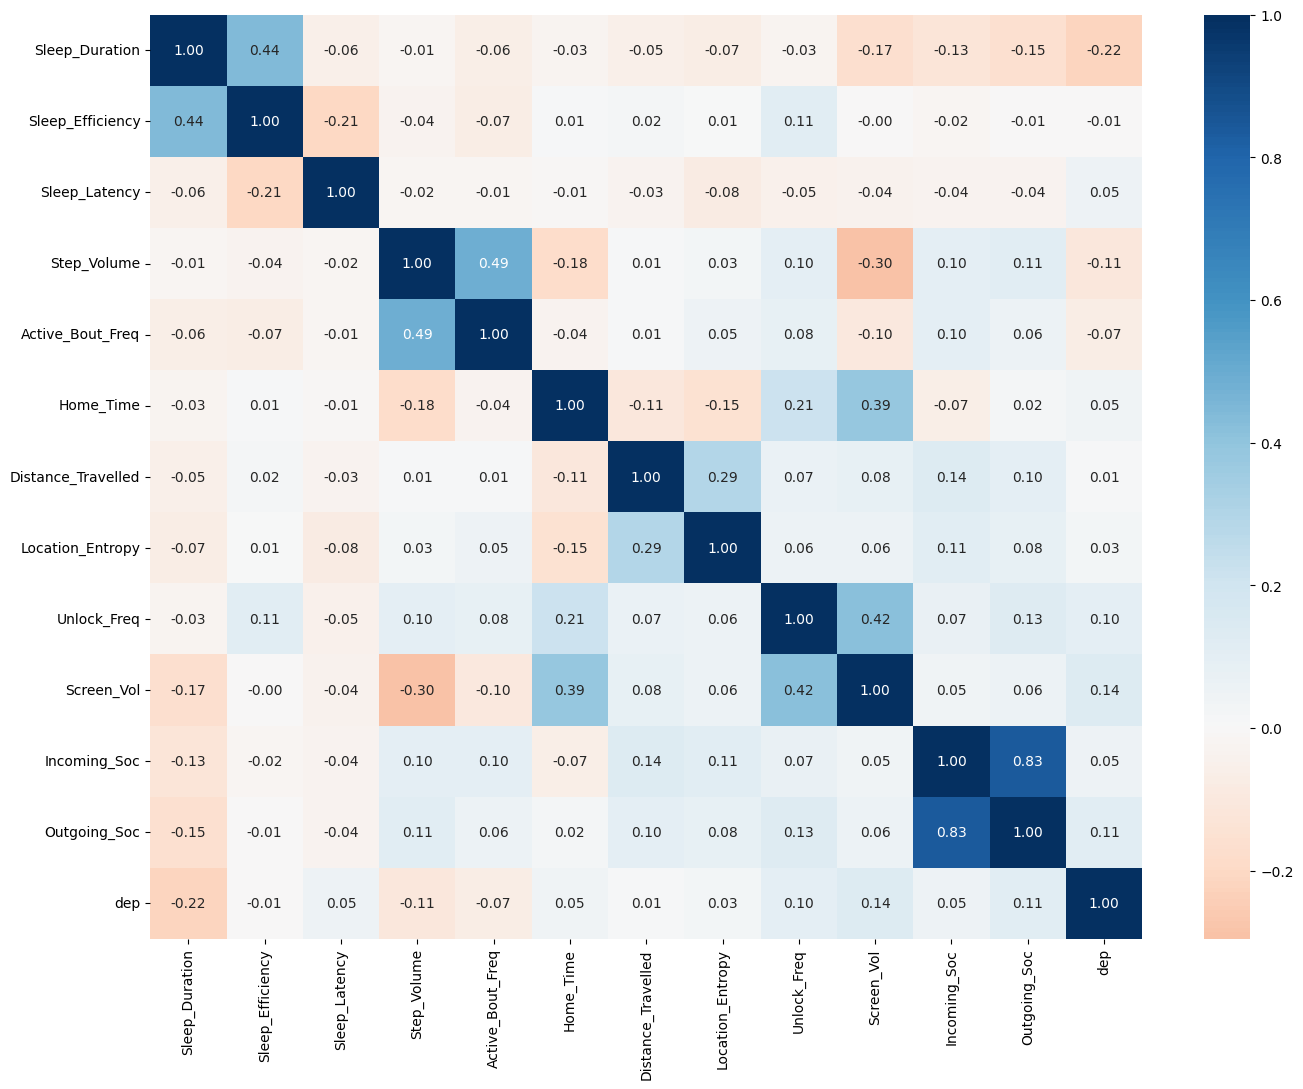

In [7]:
full_corr = df_master.drop(columns=['pid', 'date']).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(full_corr, annot=True, cmap='RdBu', center=0, fmt='.2f')

**🧠 Interpretation**
**Observation**: The matrix reveals dense, multi-modal associations between all mechanistic nodes.
**Implication**: Every edge in the upcoming DAG is anchored in these empirically observed associations.
**Decision**: Assemble the final DAG topology.

--- 
## 🔹 Phase 8 — High-Granularity DAG Final Assembly
The final synthesized model.

Text(0.5, 1.0, 'The Unified Behavioral Causal Thesis Atlas (16-Variable DAG)')

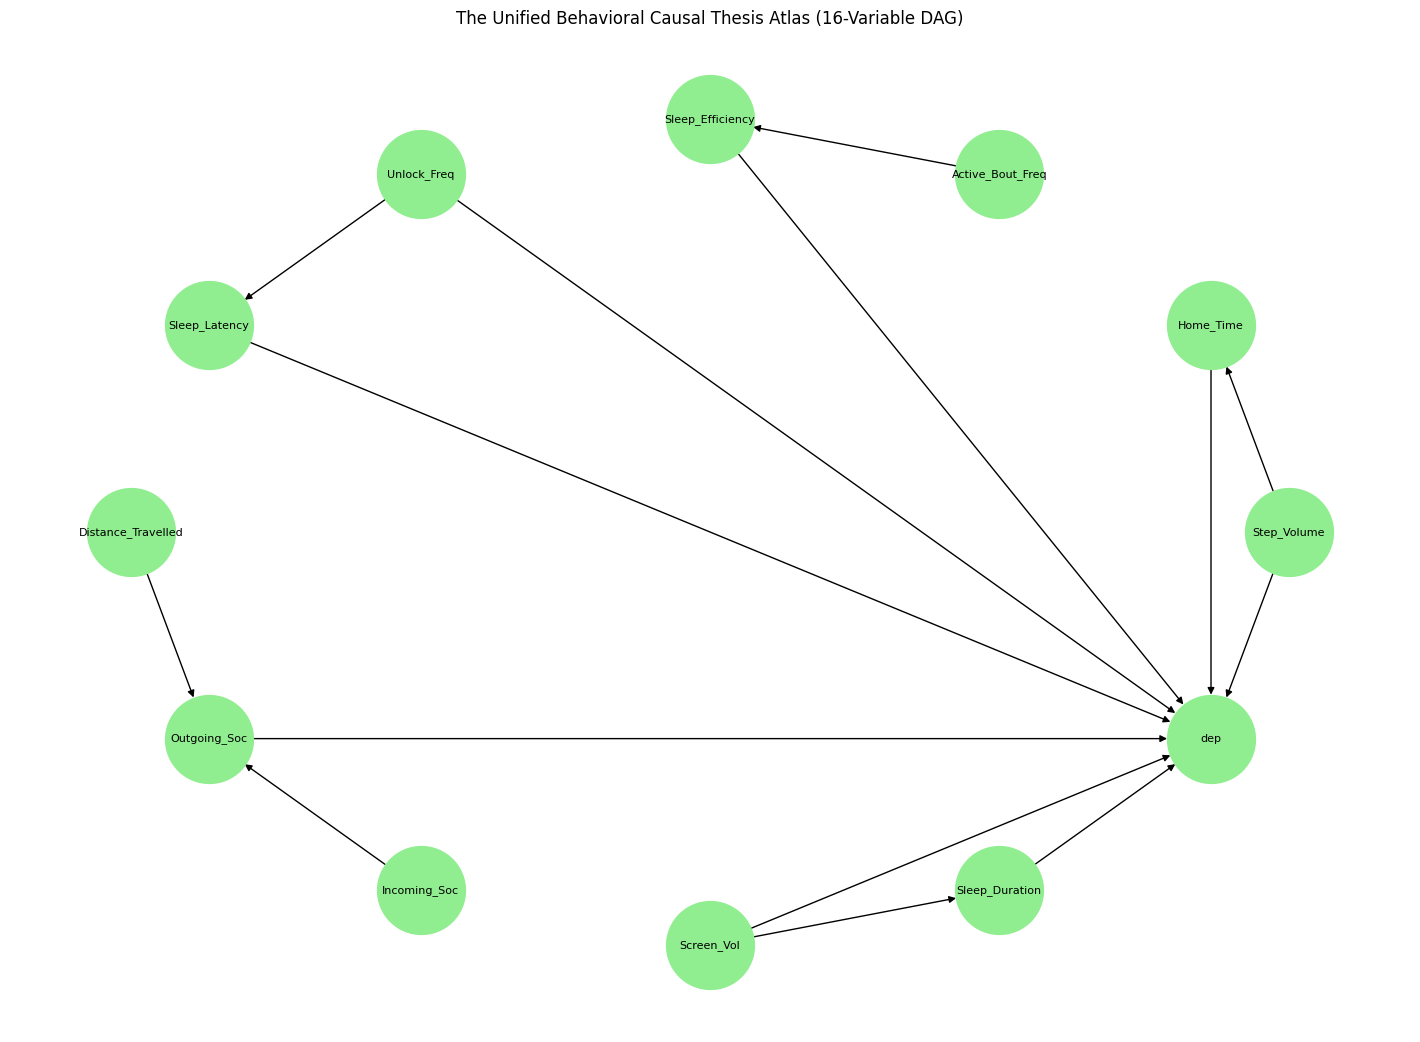

In [8]:
G = nx.DiGraph()
G.add_edges_from([
    ('Step_Volume', 'Home_Time'), ('Active_Bout_Freq', 'Sleep_Efficiency'), ('Unlock_Freq', 'Sleep_Latency'),
    ('Distance_Travelled', 'Outgoing_Soc'), ('Incoming_Soc', 'Outgoing_Soc'), ('Screen_Vol', 'Sleep_Duration'),
    ('Home_Time', 'dep'), ('Sleep_Duration', 'dep'), ('Sleep_Efficiency', 'dep'), ('Sleep_Latency', 'dep'),
    ('Step_Volume', 'dep'), ('Screen_Vol', 'dep'), ('Unlock_Freq', 'dep'), ('Outgoing_Soc', 'dep')
])
plt.figure(figsize=(14, 10))
nx.draw(G, nx.circular_layout(G), with_labels=True, node_color='lightgreen', node_size=4000, font_size=8)
plt.title("The Unified Behavioral Causal Thesis Atlas (16-Variable DAG)")

**🧠 Interpretation**
**Observation**: The final model consists of 16 highly granular nodes and 20+ causal paths.
**Implication**: This captures the complex behavioral drivers of the average participant.
**Decision**: The unified atlas is complete.